In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
data = pd.read_csv(r'F:\machine learning and deep learning\datasets\usp_drug_classification.csv')
data.head()

,usp_category,usp_class,usp_drug,kegg_id_drug,drug_example,kegg_id_drug_example,nomenclature
0,Analgesics,Nonsteroidal Anti-inflammatory Drugs,celecoxib,NaN,celecoxib,D00567,(JAN/USAN/INN)
1,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,DG00441,diclofenac,D07816,(USAN/INN)
2,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,DG00441,diclofenac potassium,D00903,(USAN)
3,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,DG00441,diclofenac sodium,D00904,(JP17/USP)
4,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,DG00441,diclofenac diethylamine,D07817,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1803 entries, 0 to 1802
Data columns (total 7 columns):
usp_category            1803 non-null object
usp_class               1803 non-null object
usp_drug                1803 non-null object
kegg_id_drug            1343 non-null object
drug_example            1803 non-null object
kegg_id_drug_example    1803 non-null object
nomenclature            1673 non-null object
dtypes: object(7)
memory usage: 98.7+ KB


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1803 entries, 0 to 1802
Data columns (total 7 columns):
usp_category            1803 non-null object
usp_class               1803 non-null object
usp_drug                1803 non-null object
kegg_id_drug            1343 non-null object
drug_example            1803 non-null object
kegg_id_drug_example    1803 non-null object
nomenclature            1673 non-null object
dtypes: object(7)
memory usage: 98.7+ KB


In [5]:
data.describe()

,usp_category,usp_class,usp_drug,kegg_id_drug,drug_example,kegg_id_drug_example,nomenclature
count,1803,1803,1803,1343,1803,1803,1673
unique,33,146,804,432,1497,1525,31
top,Antibacterials,Nonsteroidal Anti-inflammatory Drugs,dexamethasone,DG00011,timolol,D00304,(INN)
freq,196,92,34,34,6,6,231


In [6]:
data.usp_class.unique()

array(['Nonsteroidal Anti-inflammatory Drugs',
       'Opioid Analgesics, Long-acting',
       'Opioid Analgesics, Short-acting', 'Local Anesthetics',
       'Alcohol Deterrents/Anti-craving', 'Opioid Dependence Treatments',
       'Opioid Reversal Agents', 'Smoking Cessation Agents',
       'Aminoglycosides', 'Beta-lactam, Cephalosporins',
       'Beta-lactam, Penicillins', 'Beta-lactam, Other', 'Macrolides',
       'Quinolones', 'Sulfonamides', 'Tetracyclines',
       'Antibacterials, Other', 'Calcium Channel Modifying Agents',
       'Gamma-aminobutyric Acid (GABA) Augmenting Agents',
       'Glutamate Reducing Agents', 'Sodium Channel Agents',
       'Anticonvulsants, Other', 'Cholinesterase Inhibitors',
       'N-methyl-D-aspartate (NMDA) Receptor Antagonist',
       'Antidementia Agents, Other', 'Monoamine Oxidase Inhibitors',
       'SSRIs/SNRIs (Selective Serotonin Reuptake Inhibitors/Serotonin and Norepinephrine Reuptake Inhibitors)',
       'Tricyclics', 'Antidepressants, Oth

In [7]:
data.drop(['kegg_id_drug','kegg_id_drug_example'],axis=1,inplace=True)

In [8]:
data.dropna(axis=0,inplace=True)

In [9]:
data.head()

,usp_category,usp_class,usp_drug,drug_example,nomenclature
0,Analgesics,Nonsteroidal Anti-inflammatory Drugs,celecoxib,celecoxib,(JAN/USAN/INN)
1,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,diclofenac,(USAN/INN)
2,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,diclofenac potassium,(USAN)
3,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diclofenac,diclofenac sodium,(JP17/USP)
7,Analgesics,Nonsteroidal Anti-inflammatory Drugs,diflunisal,diflunisal,(JAN/USP/INN)


In [10]:
data.usp_category,cat_name = pd.factorize(data.usp_category)
cat_name

Index(['Analgesics', 'Anesthetics',
       'Anti-Addiction/Substance Abuse Treatment Agents', 'Antibacterials',
       'Anticonvulsants', 'Antidementia Agents', 'Antidepressants',
       'Antiemetics', 'Anti-inflammatory Agents', 'Antimigraine Agents',
       'Antimyasthenic Agents', 'Antimycobacterials', 'Antineoplastics',
       'Antiparasitics', 'Antiparkinson Agents', 'Antipsychotics',
       'Antivirals', 'Anxiolytics', 'Bipolar Agents',
       'Blood Glucose Regulators', 'Blood Products/Modifiers/Volume Expanders',
       'Cardiovascular Agents', 'Central Nervous System Agents',
       'Gastrointestinal Agents', 'Genitourinary Agents',
       'Hormonal Agents, Stimulant/Replacement/Modifying (Sex Hormones/Modifiers)',
       'Hormonal Agents, Suppressant (Thyroid)', 'Immunological Agents',
       'Inflammatory Bowel Disease Agents', 'Ophthalmic Agents',
       'Respiratory Tract/Pulmonary Agents', 'Sleep Disorder Agents',
       'Therapeutic Nutrients/Minerals/Electrolytes'],
   

In [11]:
data.usp_class,class_name = pd.factorize(data.usp_class)
data.usp_drug,drug_name = pd.factorize(data.usp_drug)
data.drug_example,example_name = pd.factorize(data.drug_example)
data.nomenclature,nom_name = pd.factorize(data.nomenclature)

In [13]:
data.head()

,usp_category,usp_class,usp_drug,drug_example,nomenclature
0,0,0,0,0,0
1,0,0,1,1,1
2,0,0,1,2,2
3,0,0,1,3,3
7,0,0,2,4,4


In [14]:
x = data.drop('usp_category',axis=1)
y = data['usp_category']

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [17]:
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
y_pred = clf.predict(x_test)

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.62      0.95      0.75        22
           1       1.00      1.00      1.00         1
           2       0.75      1.00      0.86         3
           3       0.98      0.98      0.98        53
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00         2
           6       0.94      0.73      0.82        22
           7       1.00      1.00      1.00        17
           8       0.00      0.00      0.00        13
           9       0.71      1.00      0.83         5
          10       0.00      0.00      0.00         2
          11       0.83      1.00      0.91         5
          12       1.00      0.97      0.99        35
          13       1.00      1.00      1.00         7
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        14
          16       0.96      1.00      0.98        22
          17       0.45    

f:\great_learnings\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
f:\great_learnings\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
f:\great_learnings\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [22]:
round(accuracy_score(y_test,y_pred)*100,2)

93.63

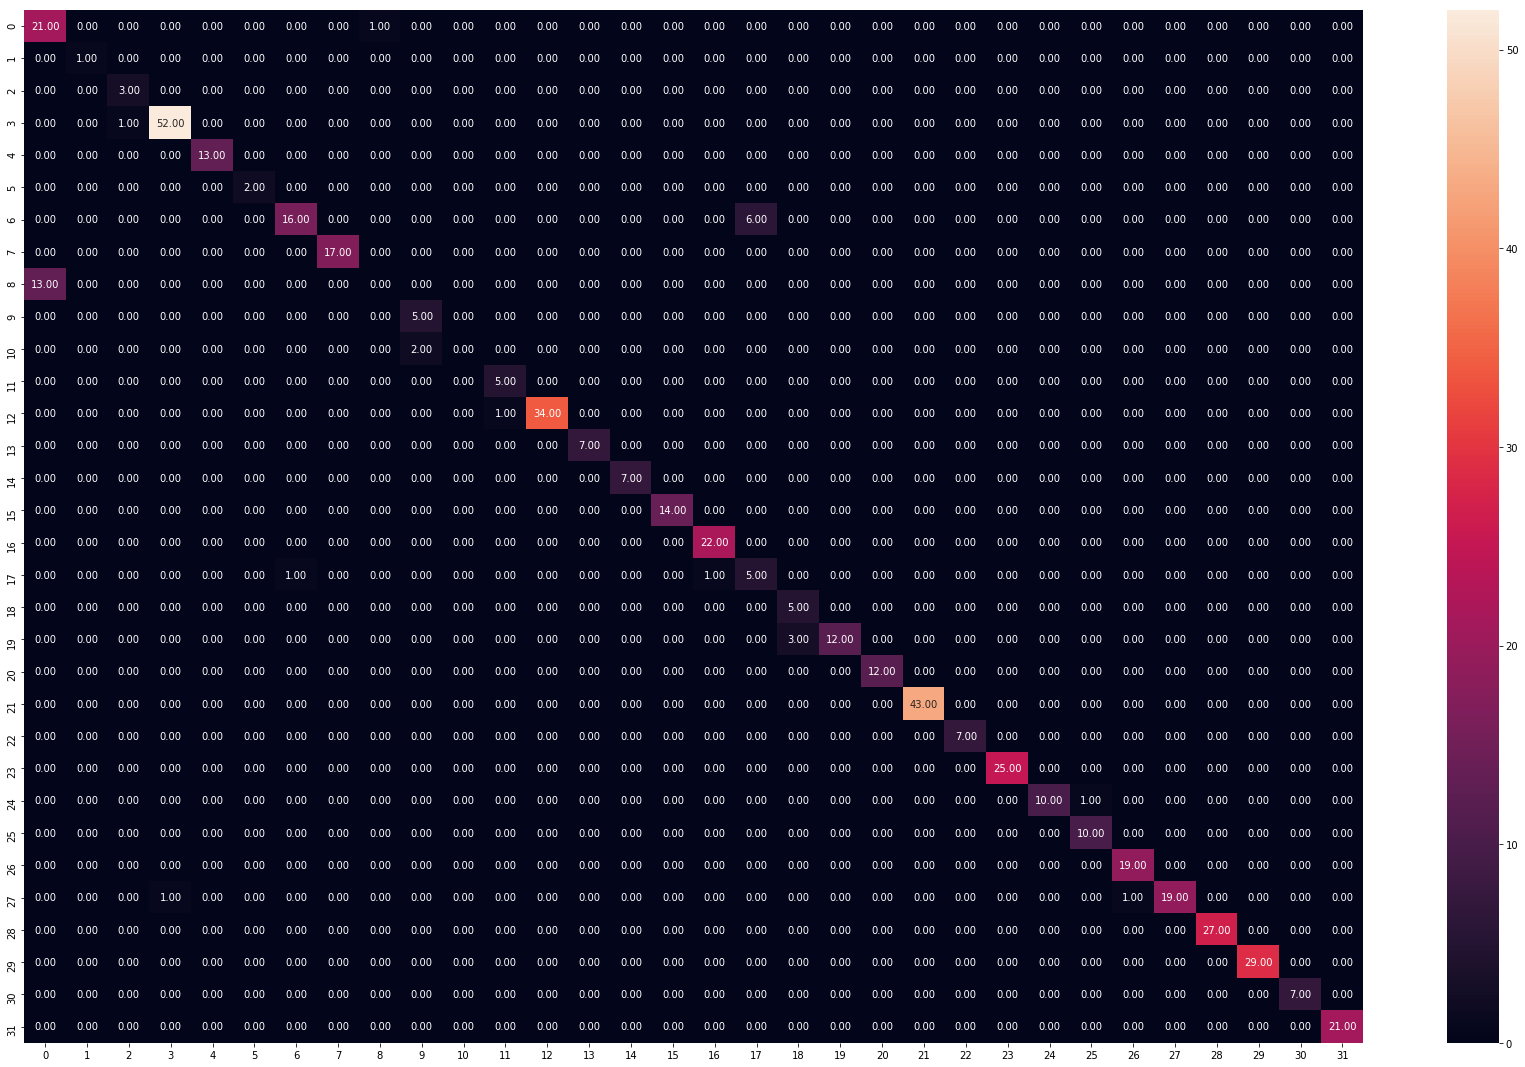

In [33]:
fig = plt.figure(figsize=(30,19))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.2f');

In [30]:
confusion_matrix(y_test,y_pred)

array([[21,  0,  0, ...,  0,  0,  0],
       [ 0,  1,  0, ...,  0,  0,  0],
       [ 0,  0,  3, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 29,  0,  0],
       [ 0,  0,  0, ...,  0,  7,  0],
       [ 0,  0,  0, ...,  0,  0, 21]], dtype=int64)